In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Upload the Uber file
uploaded = files.upload()

In [ ]:
# Upload the Taxi file
uploaded = files.upload()

In [ ]:
# Upload the Zone file
uploaded = files.upload()

Uber

In [ ]:
# Once uploaded, read the Excel file
file_name = "Uber_final.xlsx"  # Make sure the file name matches
dfu = pd.read_excel(file_name)

In [ ]:
# Display the first few rows of the DataFrame
print(dfu.head())

   Uber_PULocationID  Uber_DOLocationID  Uber_trip_miles  Uber_trip_time  \
0                162                234             2.49       13.083333   
1                231                246             2.91       16.283333   
2                229                142             2.40       25.033333   
3                 79                 79             0.65        3.966667   
4                163                163             2.36       20.300000   

   Uber_base_passenger_fare  Uber_total_fees  Uber_tips  Uber_driver_pay  \
0                     16.16             4.62       0.00            11.02   
1                     28.62             6.08       6.94            21.46   
2                     26.17             5.79       0.00            17.85   
3                      8.27             3.71       0.00             5.39   
4                     40.45             7.45      12.00            22.86   

   Uber_date Uber_request_time Uber_on_scene_time Uber_pickup_time  \
0 2024-05-05    

In [ ]:
print(dfu.dtypes)

Uber_PULocationID                    int64
Uber_DOLocationID                    int64
Uber_trip_miles                    float64
Uber_trip_time                     float64
Uber_base_passenger_fare           float64
Uber_total_fees                    float64
Uber_tips                          float64
Uber_driver_pay                    float64
Uber_date                   datetime64[ns]
Uber_request_time                   object
Uber_on_scene_time                  object
Uber_pickup_time                    object
Uber_dropoff_time                   object
zone                                object
dtype: object


Taxi

In [ ]:
# Once uploaded, read the Excel file
file_name = "Taxi_final.xlsx"  # Make sure the file name matches
dft = pd.read_excel(file_name)

In [ ]:
# Display the first few rows of the DataFrame
print(dft.head())

  Taxi_pickup_date Taxi_pickup_time Taxi_dropoff_date Taxi_dropoff_time  \
0       2024-06-01         22:58:38        2024-06-01          23:03:07   
1       2024-05-31         19:05:31        2024-05-31          19:15:25   
2       2024-05-18         15:59:20        2024-05-18          16:21:27   
3       2024-03-30         20:33:04        2024-03-30          20:44:41   
4       2024-05-04         01:14:19        2024-05-04          01:23:42   

   Taxi_PULocationID  Taxi_DOLocationID  Taxi_trip_distance  \
0                231                249                0.00   
1                 79                  4                1.07   
2                148                170                1.91   
3                246                 50                0.95   
4                114                107                1.51   

   Taxi_trip_time_minutes  Taxi_fare_amount  Taxi_total_fees  Taxi_tip_amount  \
0                4.483333               5.8              5.0             3.24   
1       

In [ ]:
print(dft.dtypes)

Taxi_pickup_date          datetime64[ns]
Taxi_pickup_time                  object
Taxi_dropoff_date         datetime64[ns]
Taxi_dropoff_time                 object
Taxi_PULocationID                  int64
Taxi_DOLocationID                  int64
Taxi_trip_distance               float64
Taxi_trip_time_minutes           float64
Taxi_fare_amount                 float64
Taxi_total_fees                  float64
Taxi_tip_amount                  float64
Taxi_total_amount                float64
Taxi_payment_type                 object
Taxi_passenger_count               int64
zone                              object
dtype: object


Group by zone

In [ ]:
# Group by 'Uber_PULocationID' and count the number of rows
uber_grouped_table = dfu.groupby('Uber_PULocationID').size().reset_index(name='Uber_Row_Count')

# Sort the table in descending order by 'Uber_Row_Count'
uber_grouped_table = uber_grouped_table.sort_values(by='Uber_Row_Count', ascending=False)

# Group by 'Taxi_PULocationID' and count the number of rows
taxi_grouped_table = dft.groupby('Taxi_PULocationID').size().reset_index(name='Taxi_Row_Count')

# Sort the table in descending order by 'Taxi_Row_Count'
taxi_grouped_table = taxi_grouped_table.sort_values(by='Taxi_Row_Count', ascending=False)

# Merge the two grouped tables on the common Location ID
# Assuming Uber_PULocationID and Taxi_PULocationID represent the same IDs
merged_table = pd.merge(
    uber_grouped_table,
    taxi_grouped_table,
    left_on='Uber_PULocationID',
    right_on='Taxi_PULocationID',
    how='outer'
)

# Fill NaN values with 0 (if any Location ID exists only in one dataset)
merged_table = merged_table.fillna(0)

# Rename columns for clarity
merged_table = merged_table.rename(columns={
    'Uber_PULocationID': 'Location_ID_Uber',
    'Taxi_PULocationID': 'Location_ID_Taxi'
})

# Add difference Column
merged_table["Difference"] = merged_table["Uber_Row_Count"] - merged_table["Taxi_Row_Count"]

# Drop same Column
merged_table_clean=merged_table.drop(columns=['Location_ID_Taxi'])
print(merged_table_clean)

    Location_ID_Uber  Uber_Row_Count  Taxi_Row_Count  Difference
0                  4             696             163         533
1                 12              24              31          -7
2                 13             698             394         304
3                 43             389            1315        -926
4                 45             468             124         344
5                 48            1765            2055        -290
6                 50            1107             478         629
7                 68            2118            2105          13
8                 79            3311            2544         767
9                 87            1121             401         720
10                88             443             177         266
11                90            1456            1434          22
12               100             885            1039        -154
13               107            1777            1698          79
14               113     

In [ ]:
# Once uploaded, read the Excel file
file_name = "zone.xlsx"  # Make sure the file name matches
dfz = pd.read_excel(file_name)
print(dfz.tail())

     OBJECTID                       zone  LocationID    borough
258       256  Williamsburg (South Side)         256   Brooklyn
259       259         Woodlawn/Wakefield         259      Bronx
260       260                   Woodside         260     Queens
261       261         World Trade Center         261  Manhattan
262       262             Yorkville East         262  Manhattan


In [ ]:
# Merge 'OJECTID' and 'zone' from dfz into merged_clean_table
merged_table_zone = pd.merge(merged_table_clean,                  # The base table
    dfz[['OBJECTID', 'zone']],          # Select 'OBJECTID  ' and 'zone' from dfz
    left_on='Location_ID_Uber',          # Match 'Location_ID_Uber' from merged_clean_table
    right_on='OBJECTID',                # Match with 'OBJECTID  ' in dfz
    how='left'                           # Retain all rows from merged_clean_table
)

# Drop the duplicate 'Object_ID' column after merging (if necessary)
merged_table_zone_clean = merged_table_zone.drop(columns=['OBJECTID'])

# Display the resulting table
merged_table_zone_clean

# Sort the DataFrame in descending order by 'Uber_Row_Count'
filtered_descending = merged_table_zone_clean.sort_values(by='Uber_Row_Count', ascending=False)

# Display the filtered DataFrame
filtered_descending

,Location_ID_Uber,Uber_Row_Count,Taxi_Row_Count,Difference,zone
8,79,3311,2544,767,East Village
46,249,2474,2470,4,West Village
37,231,2379,980,1399,TriBeCa/Civic Center
23,148,2147,1249,898,Lower East Side
7,68,2118,2105,13,East Chelsea
45,246,2068,1504,564,West Chelsea/Hudson Yards
40,234,2033,2035,-2,Union Sq
36,230,1874,2426,-552,Times Sq/Theatre District
28,164,1870,1600,270,Midtown South
13,107,1777,1698,79,Gramercy


In [ ]:
# Calculate the sum of Uber_Row_Count and Taxi_Row_Count
sum_uber_row_count = merged_table_zone_clean['Uber_Row_Count'].sum()
sum_taxi_row_count = merged_table_zone_clean['Taxi_Row_Count'].sum()

# Display the sums
sum_uber_row_count, sum_taxi_row_count

(60000, 60000)


Targeting Variable(High_Demand_Zone)

In [ ]:
# Calculate the 90th percentile threshold for Uber_Row_Count
threshold = merged_table_zone_clean["Uber_Row_Count"].quantile(0.9)

# Create the High Demand Zone (Binary) target variable
merged_table_zone_clean["High_Demand_Zone"] = (merged_table_zone_clean["Uber_Row_Count"] >= threshold).astype(int)

In [ ]:
merged_table_zone_clean

,Location_ID_Uber,Uber_Row_Count,Taxi_Row_Count,Difference,zone,High_Demand_Zone
0,4,696,163,533,Alphabet City,0
1,12,24,31,-7,Battery Park,0
2,13,698,394,304,Battery Park City,0
3,43,389,1315,-926,Central Park,0
4,45,468,124,344,Chinatown,0
5,48,1765,2055,-290,Clinton East,0
6,50,1107,478,629,Clinton West,0
7,68,2118,2105,13,East Chelsea,1
8,79,3311,2544,767,East Village,1
9,87,1121,401,720,Financial District North,0


## Features
- Time of Day : Peak times for rides (e.g., morning or evening rush hours).
- Average Trip Duration : Longer trips may indicate higher demand.
- Average Trip distance : Zones with shorter distances might have higher churn rates.
- Uber Row Count : The total number of Uber pickups in the zone.
- Taxi Row Count : The total number of Taxi pickups in the zone.

In [ ]:
dft.head()

,Taxi_pickup_date,Taxi_pickup_time,Taxi_dropoff_date,Taxi_dropoff_time,Taxi_PULocationID,Taxi_DOLocationID,Taxi_trip_distance,Taxi_trip_time_minutes,Taxi_fare_amount,Taxi_total_fees,Taxi_tip_amount,Taxi_total_amount,Taxi_payment_type,Taxi_passenger_count,zone
0,2024-06-01,22:58:38,2024-06-01,23:03:07,231,249,0.00,4.483333,5.8,5.0,3.24,14.04,Credit card,1,TriBeCa/Civic Center
1,2024-05-31,19:05:31,2024-05-31,19:15:25,79,4,1.07,9.900000,10.7,6.5,0.00,17.20,Credit card,2,East Village
2,2024-05-18,15:59:20,2024-05-18,16:21:27,148,170,1.91,22.116667,19.8,4.0,0.00,23.80,Credit card,2,Lower East Side
3,2024-03-30,20:33:04,2024-03-30,20:44:41,246,50,0.95,11.616667,11.4,5.0,3.28,19.68,Credit card,1,West Chelsea/Hudson Yards
4,2024-05-04,01:14:19,2024-05-04,01:23:42,114,107,1.51,9.383333,10.7,5.0,3.00,18.70,Credit card,2,Greenwich Village South


In [ ]:
# Assuming `merged_table_zone_clean` contains High_Demand_Zone and Location_ID_Uber
# Assuming `dft` contains Taxi_PULocationID

# Merge the High_Demand_Zone column from merged_table_zone_clean to dft
dft = pd.merge(
    dft,
    merged_table_zone_clean[['Location_ID_Uber', 'High_Demand_Zone']],
    left_on='Taxi_PULocationID',
    right_on='Location_ID_Uber',
    how='left'
)

# Drop the redundant Location_ID_Uber column
dft = dft.drop(columns=['Location_ID_Uber'])

# Display the updated DataFrame
print(dft)

      Taxi_pickup_date Taxi_pickup_time Taxi_dropoff_date Taxi_dropoff_time  \
0           2024-06-01         22:58:38        2024-06-01          23:03:07   
1           2024-05-31         19:05:31        2024-05-31          19:15:25   
2           2024-05-18         15:59:20        2024-05-18          16:21:27   
3           2024-03-30         20:33:04        2024-03-30          20:44:41   
4           2024-05-04         01:14:19        2024-05-04          01:23:42   
...                ...              ...               ...               ...   
59995       2024-03-16         19:58:37        2024-03-16          20:09:17   
59996       2024-03-02         23:04:31        2024-03-02          23:13:29   
59997       2024-03-24         12:36:33        2024-03-24          12:42:32   
59998       2024-05-31         23:15:30        2024-05-31          23:20:03   
59999       2024-04-06         15:51:17        2024-04-06          16:29:42   

       Taxi_PULocationID  Taxi_DOLocationID  Taxi_t

In [ ]:
dft_drop1 = dft.copy()

# Split the 'Taxi_pickup_date' column into year, month, and day in the new DataFrame
dft_drop1['Pickup_Year'] = pd.to_datetime(dft_drop1['Taxi_pickup_date']).dt.year
dft_drop1['Pickup_Month'] = pd.to_datetime(dft_drop1['Taxi_pickup_date']).dt.month
dft_drop1['Pickup_Day'] = pd.to_datetime(dft_drop1['Taxi_pickup_date']).dt.day

# Convert 'Taxi_pickup_time' to seconds since midnight
dft_drop1['Taxi_pickup_time_seconds'] = pd.to_datetime(dft_drop1['Taxi_pickup_time'], format='%H:%M:%S', errors='coerce').dt.hour * 3600 + \
                                        pd.to_datetime(dft_drop1['Taxi_pickup_time'], format='%H:%M:%S', errors='coerce').dt.minute * 60 + \
                                        pd.to_datetime(dft_drop1['Taxi_pickup_time'], format='%H:%M:%S', errors='coerce').dt.second

In [ ]:
dft_drop1.head()

,Taxi_pickup_date,Taxi_pickup_time,Taxi_dropoff_date,Taxi_dropoff_time,Taxi_PULocationID,Taxi_DOLocationID,Taxi_trip_distance,Taxi_trip_time_minutes,Taxi_fare_amount,Taxi_total_fees,Taxi_tip_amount,Taxi_total_amount,Taxi_payment_type,Taxi_passenger_count,zone,High_Demand_Zone,Pickup_Year,Pickup_Month,Pickup_Day,Taxi_pickup_time_seconds
0,2024-06-01,22:58:38,2024-06-01,23:03:07,231,249,0.00,4.483333,5.8,5.0,3.24,14.04,Credit card,1,TriBeCa/Civic Center,1,2024,6,1,82718
1,2024-05-31,19:05:31,2024-05-31,19:15:25,79,4,1.07,9.900000,10.7,6.5,0.00,17.20,Credit card,2,East Village,1,2024,5,31,68731
2,2024-05-18,15:59:20,2024-05-18,16:21:27,148,170,1.91,22.116667,19.8,4.0,0.00,23.80,Credit card,2,Lower East Side,1,2024,5,18,57560
3,2024-03-30,20:33:04,2024-03-30,20:44:41,246,50,0.95,11.616667,11.4,5.0,3.28,19.68,Credit card,1,West Chelsea/Hudson Yards,0,2024,3,30,73984
4,2024-05-04,01:14:19,2024-05-04,01:23:42,114,107,1.51,9.383333,10.7,5.0,3.00,18.70,Credit card,2,Greenwich Village South,0,2024,5,4,4459


In [ ]:
# List of columns to drop
columns_to_drop = [
    'Taxi_pickup_date',
    'Taxi_pickup_time',
    'Taxi_dropoff_date',
    'Taxi_dropoff_time',
    'Taxi_DOLocationID',
    'Pickup_Year'
]

# Drop the columns and create a new DataFrame
dft_analysis_drop2 = dft_drop1.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(dft_analysis_drop2.head())


   Taxi_PULocationID  Taxi_trip_distance  Taxi_trip_time_minutes  \
0                231                0.00                4.483333   
1                 79                1.07                9.900000   
2                148                1.91               22.116667   
3                246                0.95               11.616667   
4                114                1.51                9.383333   

   Taxi_fare_amount  Taxi_total_fees  Taxi_tip_amount  Taxi_total_amount  \
0               5.8              5.0             3.24              14.04   
1              10.7              6.5             0.00              17.20   
2              19.8              4.0             0.00              23.80   
3              11.4              5.0             3.28              19.68   
4              10.7              5.0             3.00              18.70   

  Taxi_payment_type  Taxi_passenger_count                       zone  \
0       Credit card                     1       TriBeCa/Civic 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode the 'zone' column
dft_analysis_drop2['zone_encoded'] = LabelEncoder().fit_transform(dft_analysis_drop2['zone'])

# Split data into features (X) and target (y)
X = dft_analysis_drop2[['Taxi_pickup_time_seconds', 'Taxi_trip_distance', 'Taxi_PULocationID', 'Taxi_trip_time_minutes', 'Taxi_fare_amount']]
y = dft_analysis_drop2['High_Demand_Zone']  # Binary target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8440555555555556
              precision    recall  f1-score   support

           0       0.84      1.00      0.92     15195
           1       0.25      0.00      0.00      2805

    accuracy                           0.84     18000
   macro avg       0.55      0.50      0.46     18000
weighted avg       0.75      0.84      0.77     18000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi


Cross-validation accuracies for each model:
KNN: 93.36 ± 0.24
Random Forest: 99.88 ± 0.05
Logistic Regression: 84.54 ± 0.46


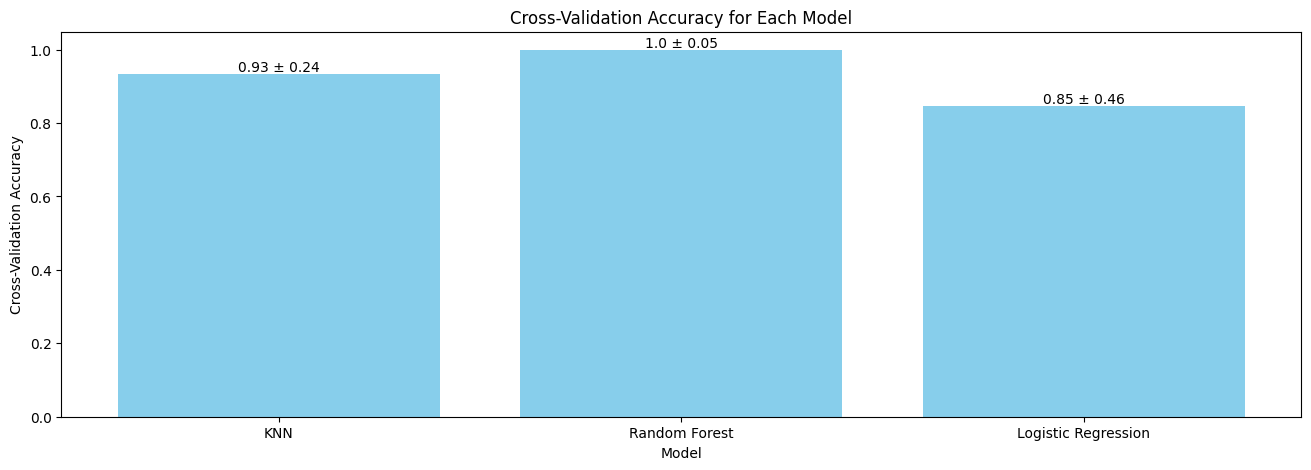

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the feature values
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

# Initialize lists to store evaluation metrics
cv_accuracy = []
accuracy = []
recall = []
precision = []
f1 = []

# Define classifiers to use
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'Random Forest': RandomForestClassifier(n_estimators=10),
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=100, solver='lbfgs', multi_class='auto')}

# Train each classifier and evaluate using cross-validation
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(clf, X_train_scaled, y_train, scoring='accuracy', cv=cv)
    cv_accuracy.append((name, scores))

# Display cross-validation accuracies for each model
print("\nCross-validation accuracies for each model:")
for name, score in cv_accuracy:
    print(f'{name}: {round(np.mean(score) * 100, 2)} ± {round(np.std(score) * 100, 2)}')

# Plot the cross-validation accuracies
model_names = [name for name, _ in cv_accuracy]
cv_scores = [np.mean(scores) for _, scores in cv_accuracy]
cv_scores_std = [np.std(scores) * 100 for _, scores in cv_accuracy]

plt.figure(figsize=(16, 5))
plt.bar(model_names, cv_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Each Model')

bars = plt.bar(model_names, cv_scores, color='skyblue')

# Adding score labels on top of each bar
for bar, score, std in zip(bars, cv_scores, cv_scores_std):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{round(score, 2)} ± {round(std, 2)}',
             ha='center', va='bottom')

plt.show()

In [ ]:
# Evaluate each classifier on the test set
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_scaled)
    print(f'\nClassification Report for {name}')
    result = classification_report(y_test, y_pred, output_dict=True)
    accuracy.append(result['accuracy'])
    recall.append(result['weighted avg']['recall'])
    precision.append(result['weighted avg']['precision'])
    f1.append(result['weighted avg']['f1-score'])

    print(classification_report(y_test, y_pred))
    print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}\n')


Classification Report for KNN
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15146
           1       0.87      0.69      0.77      2854

    accuracy                           0.93     18000
   macro avg       0.91      0.83      0.86     18000
weighted avg       0.93      0.93      0.93     18000

Accuracy Score: 93.42


Classification Report for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15146
           1       1.00      0.99      1.00      2854

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000

Accuracy Score: 99.89


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     15146
           1       0.00      0.00      0.00      2854

    accuracy     


Classification Report for KNN
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15146
           1       0.87      0.69      0.77      2854

    accuracy                           0.93     18000
   macro avg       0.91      0.83      0.86     18000
weighted avg       0.93      0.93      0.93     18000

Accuracy Score: 93.42


Classification Report for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15146
           1       1.00      0.99      1.00      2854

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000

Accuracy Score: 99.89


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     15146
           1       0.00      0.00      0.00      2854

    accuracy     

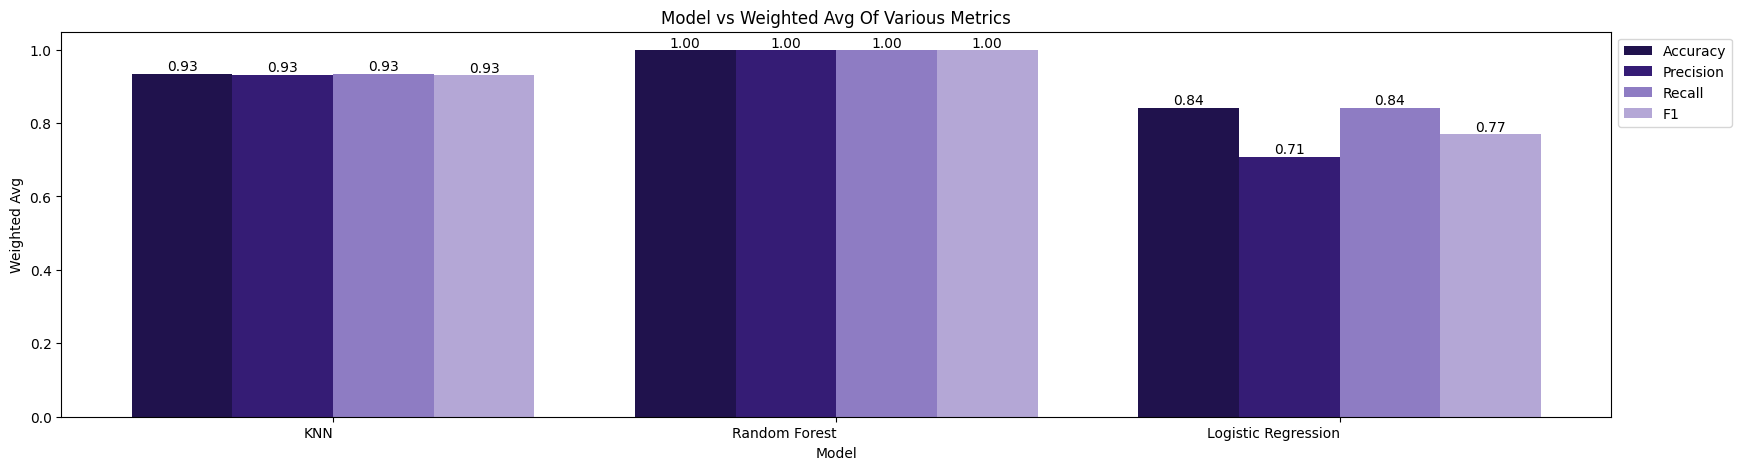

<Figure size 2000x500 with 0 Axes>

In [ ]:
# Evaluate each classifier on the test set
X = list(classifiers.keys())  # Ensure X matches classifier names
accuracy, precision, recall, f1 = [], [], [], []

for name, clf in classifiers.items():
    try:
        y_pred = clf.predict(X_test_scaled)
        print(f'\nClassification Report for {name}')
        result = classification_report(y_test, y_pred, output_dict=True)

        accuracy.append(result.get('accuracy', 0))
        weighted_avg = result.get('weighted avg', {})
        recall.append(weighted_avg.get('recall', 0))
        precision.append(weighted_avg.get('precision', 0))
        f1.append(weighted_avg.get('f1-score', 0))

        print(classification_report(y_test, y_pred))
        print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}\n')
    except Exception as e:
        print(f"Error with model {name}: {e}")

# Check that all metrics have consistent lengths
assert len(X) == len(accuracy) == len(precision) == len(recall) == len(f1), "Metric lengths do not match!"

# Plot metrics
n_bars = len(X)
n_groups = 4
total_width = 0.8
bar_width = total_width / n_groups
X_axis = np.arange(len(X))
left_positions = X_axis - (total_width - bar_width) / 2

plt.rcParams["figure.figsize"] = (20, 5)
bars_acc = plt.bar(left_positions, accuracy, bar_width, label='Accuracy', color='#20124dff')
bars_prec = plt.bar(left_positions + bar_width, precision, bar_width, label='Precision', color='#351c75ff')
bars_recall = plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall', color='#8e7cc3ff')
bars_f1 = plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1', color='#b4a7d6ff')

# Add scores on top of the bars
for bars in [bars_acc, bars_prec, bars_recall, bars_f1]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
                 ha='center', va='bottom', fontsize=10)

plt.xticks(X_axis, X, ha='right')
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
# Place legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Adjust layout
plt.tight_layout(pad=3)